# Lab#5- Jaide Swanson

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (20,60)

The Large Hadron Collider (LHC) is a particle accelerator that is developed and designed with the purpose of discovering the Higgs Boson. Through high energy proton-proton collisions that are accelerated to speeds near the speed of light the makeup of these protons can be analyzed and how they interact with the energy field known as the Higgs field. The Standard model Higgs Boson is produced by the excitation of this Higgs field and is used to explain why particles have mass as particles that interact with this field get assigned a mass. 

The LHC is made up of an inner detector that detects the track of the charged particles produced from the collisions, followed by an electromagnetic and hadronic calorimeters to measure the energies of electrons and photons or photons and neutrons. Outside of this there is then a muon detector. In order to detect a Higgs Boson the collider needs to produce about a billion events so the LHC produces about 1 billion events per second. 

An important aspect analyzed by the LHC are jets. A jet is a group of particles that move towards the same direction within the detector. In this experiment a jet is defined by a cone of size R which surrounds the particles, where everything within that defined cone R is a jet.  R is determined from the quantities for azimuthal angle and pseudorapidity (which are defined below) and is given by the equation: $R=\sqrt{\Delta \eta ^{2}+\Delta \phi ^{2}}$

### Important Quantities
The azimuthal angle $\phi$ describes the angle around the beam cylindrical beam which moves aloing the z-direction.

The polar angle $\theta$ is defined with the beams from $\theta=0$ to $\theta=\pi$ with the center of the beam being at $\theta=\frac{\pi}{2}$

Pseudorapidity $\eta$ is a geometric quantity which maps rapidity to angle and is a function of the polar angle $\theta$ going from $-\infty$ to $\infty$. It is analogous to rapidity but for massless particles. 


### Data Categories
pt: Transverse momentum in the x and y directions.

eta($\eta$): pseudorapidity, or the angle of a particle relative to the beam axis. The angle of the particle in the zy plane.

phi($\phi$): The azimuthal angle of the particle  around the beam in xy plane.

mass: Invariant mass

ee2: 2-point ECF ratio, energy correlation function ratio for 2-point correlators.

ee3: 3-point ECF ratio, energy correlation function ratio for 3-point correlators.

d2: 3 to 2 point ECF ratio

angularity($\tau$): Specific orientation of one feature to another at a referenced angle.

Jet: Grouping of particles 

N-subjettiness:  a jet shape designed to identify boosted hadronic objects such as top quarks. Given N subjet axes within a jet, N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis.

t1 - 1-subjettiness, 
t2 - 2-subjettiness,
t3 - 3-subjettiness,
t21 - 21-subjettiness,
t32 - 32-subjettiness

KtDeltaR - delta R of two subjets within the large-R jet

In [2]:
infile = open("higgs_100000_pt_1000_1200.pkl",'rb')
infile2= open("qcd_100000_pt_1000_1200.pkl",'rb')

higgs_data = pickle.load(infile)
qcd_data= pickle.load(infile2)

In [3]:
higgs_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
qcd_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [5]:
sig = np.array(higgs_data)
qcd = np.array(qcd_data)

In [6]:
sig_table = pd.DataFrame(higgs_data)
qcd_table = pd.DataFrame(qcd_data)
sig_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
qcd_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [7]:
sig_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [8]:
qcd_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


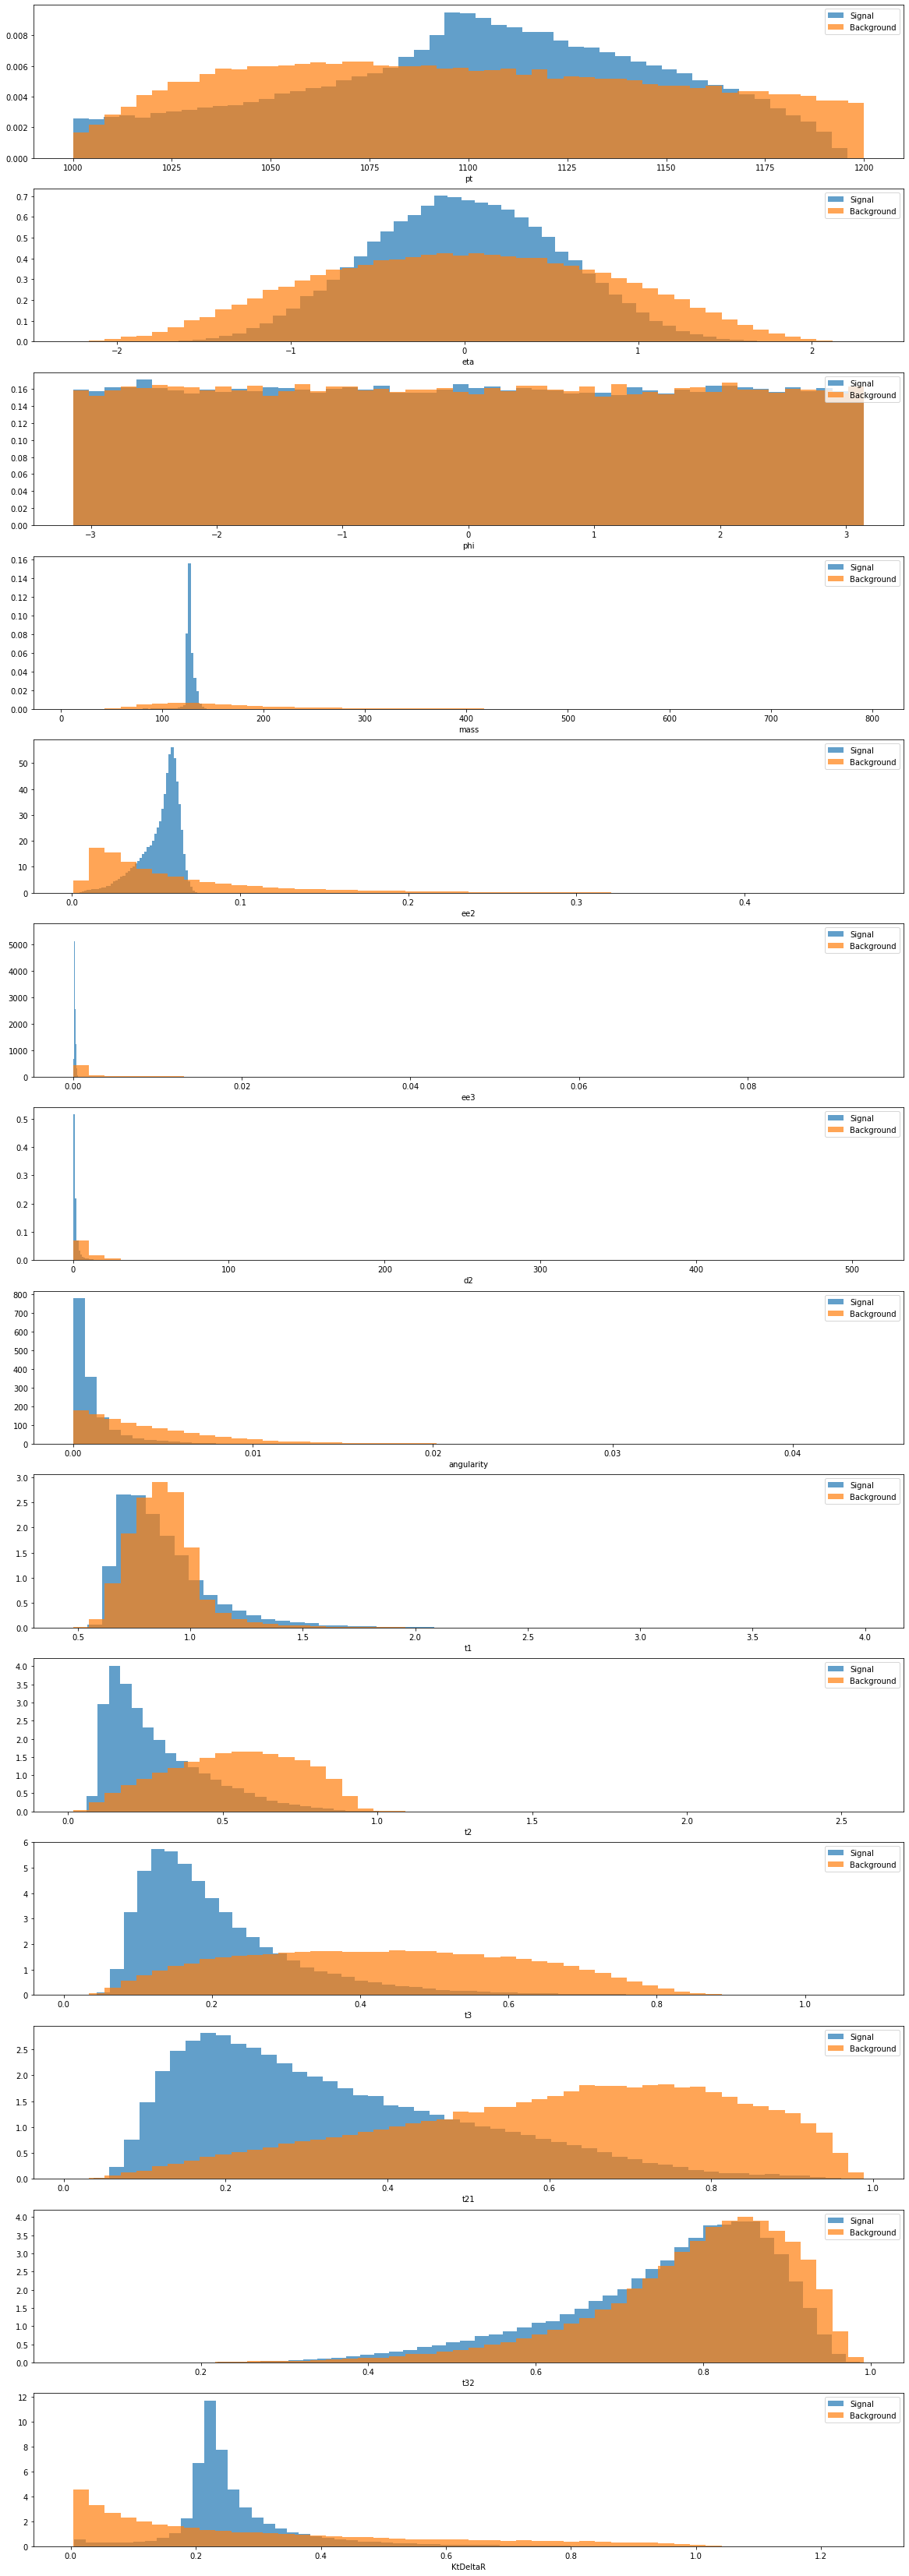

In [11]:
fig, ax = plt.subplots(14,1)

label= ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1','t2', 't3', 't21', 't32', 'KtDeltaR']
for i in range(0,14):
    ax[i].hist(sig[:,i],bins = 50, density = True, alpha = 0.7, label="Signal")
    ax[i].hist(qcd[:,i],bins = 50, density = True, alpha = 0.7, label = "Background")
    ax[i].set_xlabel(label[i])
    ax[i].legend(loc = 'best')
plt.show()

These plots show the histograms that compare the signal data to the background data for the individual data categories. Between the signal data and background data each follow a distribtutions which show obvious differences that can distniguish the two from each other except for the histograms for phi and t32 which do not obviously discriminate the two.

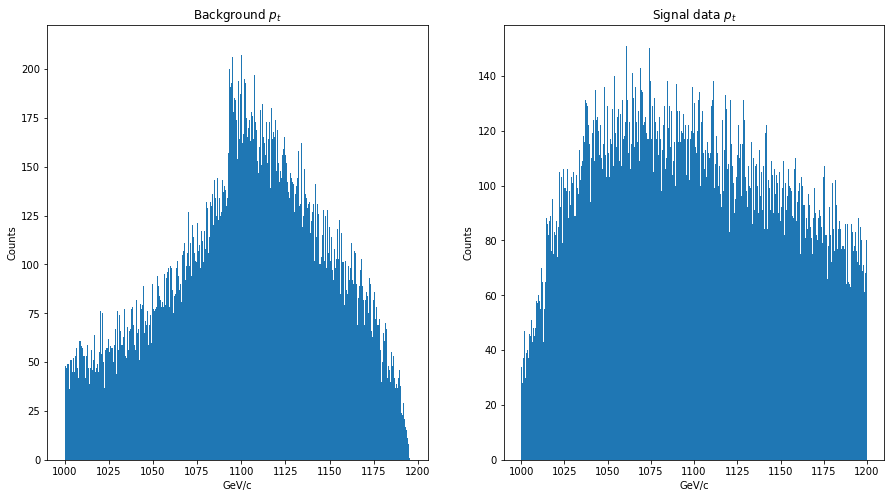

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].hist(higgs_data.get('pt'), bins = 1000)
ax[0].set_title('Background $p_t$')
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('GeV/c')
ax[1].hist(qcd_data.get('pt'), bins = 1000)
ax[1].set_title('Signal data $p_t$')
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('GeV/c')

plt.show()

Comparing the distribution for the signal and the background they show a similar peak but their pverall distributions are different  The signal distribution follows a gradual rise and fall while the background has a sharper rise and longer tail. 

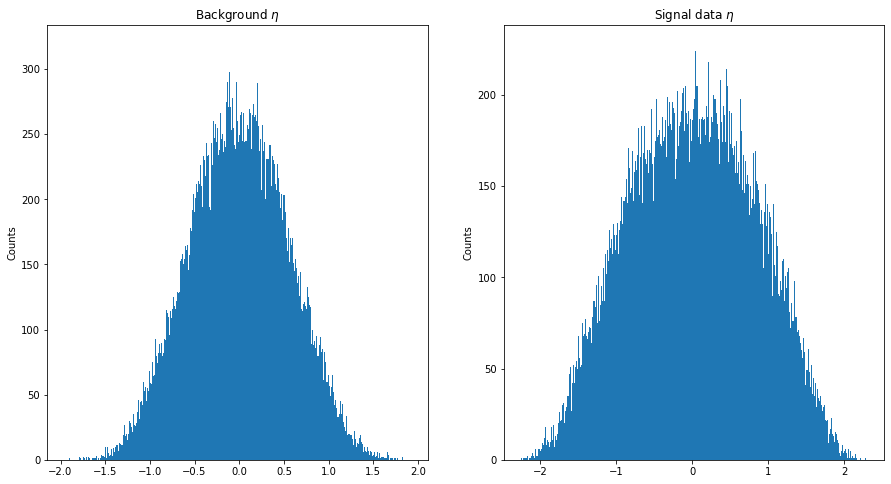

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].hist(higgs_data.get('eta'), bins = 1000)
ax[0].set_title('Background $\eta$')
ax[0].set_ylabel('Counts')
ax[1].hist(qcd_data.get('eta'), bins = 1000)
ax[1].set_title('Signal data $\eta$')
ax[1].set_ylabel('Counts')

plt.show()

Comparing the distributions for pseudorapidity between the background and signal these follow a veru similar distribution which resembles a zero mean gaussian. The only main differences is the signal data has a wider width and peaks at a lower value. 

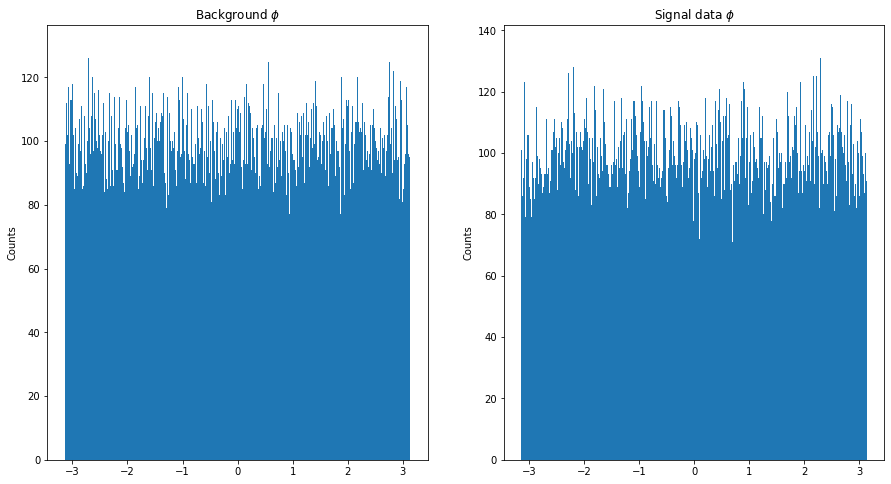

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].hist(higgs_data.get('phi'), bins = 1000)
ax[0].set_title('Background $\phi$')
ax[0].set_ylabel('Counts')
ax[1].hist(qcd_data.get('phi'), bins = 1000)
ax[1].set_title('Signal data $\phi$')
ax[1].set_ylabel('Counts')

plt.show()

Comparing the ditribution of the azimuthal angle the signal and background follow very similar distirbutions that make it hard to discriminate between the two which was noted above in the above histograms plotted over eahcother. 

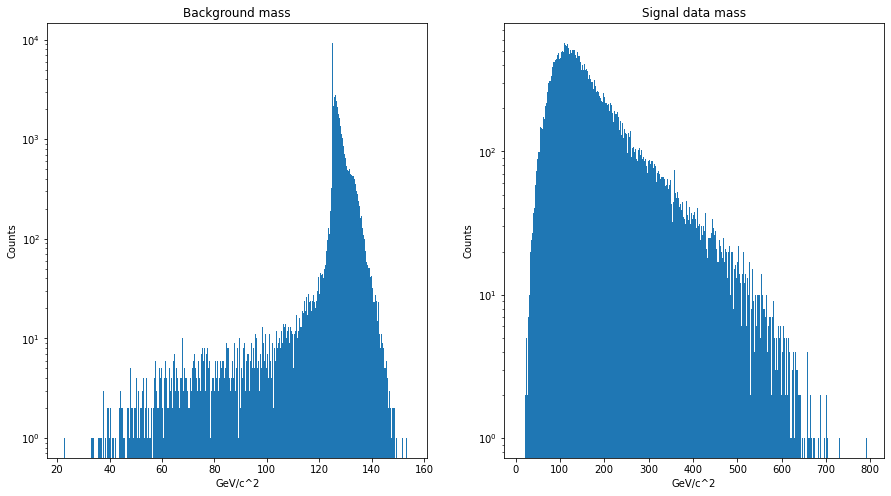

In [19]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('mass'), bins = 1000)
a[0].set_title('Background mass')
a[0].set_ylabel('Counts')
a[0].set_xlabel('GeV/c^2')
a[0].set_yscale('log')
a[1].hist(qcd_data.get('mass'), bins = 1000)
a[1].set_title('Signal data mass')
a[1].set_ylabel('Counts')
a[1].set_xlabel('GeV/c^2')
a[1].set_yscale('log')

plt.show()

The distribution for invariant mass follow very different disitributions that are almost opposite of eachother although they peak at a similar value around 125 $\frac{Gev}{c^2}$ which is consistent with denoted standard model value of the Higgs Boson of $m_h= 125 \pm 0.3 \frac{Gev}{c^2}$

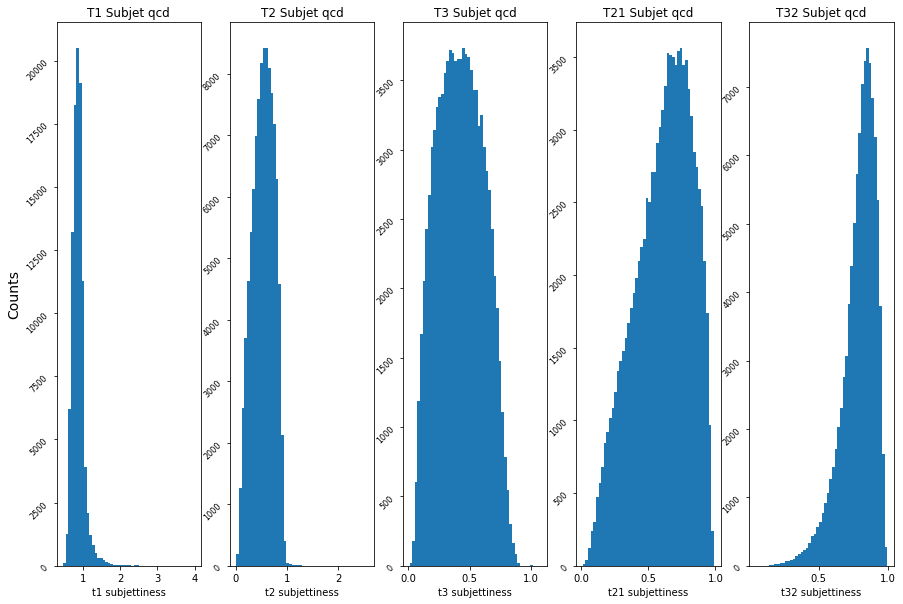

In [21]:
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Counts', fontsize=14) 
plt.title('T1 Subjet qcd', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet qcd', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet qcd', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet qcd', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet qcd', fontsize=12) 

plt.show()


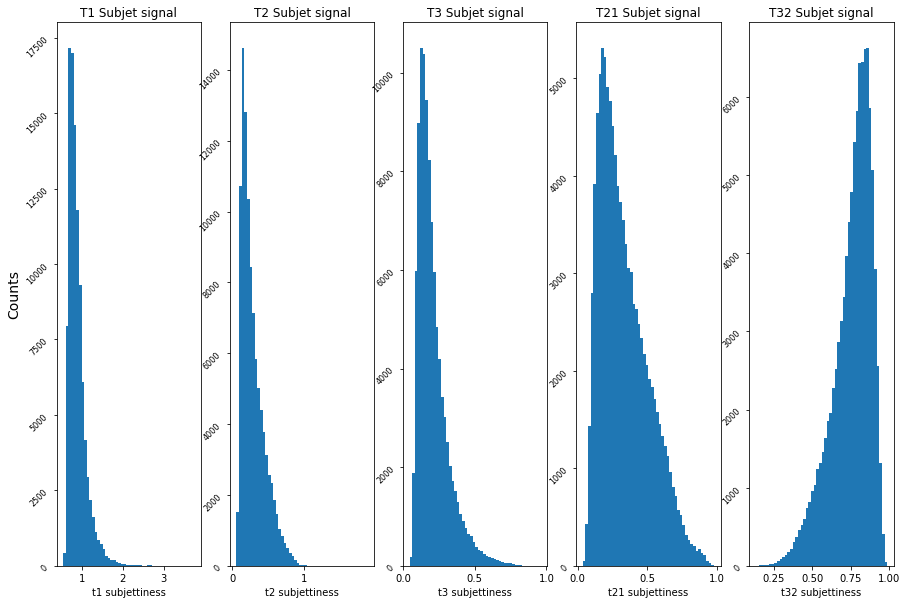

In [22]:
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Counts', fontsize=14) 
plt.title('T1 Subjet signal', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet signal', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet signal', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet signal', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet signal', fontsize=12) 

plt.show()

Comparing the subjettiness distributions the signal and the background follow a similar pattern in the distributions which show a shift in the distribution towards the right as the subjettiness is increased. The main difference between these distributions that can be seen is for the background overall the width of these distributions seems to be wider and the t3 subjettiness follows almost a gaussina distribution which doesn't appear in the signal data.